Test Results (Amendment 1)

We saved most of our test results in pickle files, which contain aggregated data for each episode. Each line in the pickle file has the following:

1. Episode #
2. Last step the episode achieved 
3. Total reward over the entire episode
4. Average speed over the entire episode

We lay out the notebook as follows:

1. We demonstrate the value of looking at average reward per step, rather than a simple plot of average reward per episode. This is largely because the number of steps per episode differ widely, and an un-normalized reward would lead to wildly different and less coherent conclusions. For example, an episode with alot of steps that has just a very small reward per step may have a greater overall reward, but may not be superior to the episode with lesser overall reward but greater reward per step. The former is just a car moving very slowly along the track and not hitting any termination conditions, while the latter could be a car deftly navigating the track but hitting a wall somewhere along the way and terminating. In this context and based on how our reward structure is setup, we would prefer the latter.

2. We go through a progression of baseline to incrementally improved results based on experimental tweaks, comparing and contrasting the differences along the way.

3. We show how different reward and demerit functions, added modules, and batch normalization can drastically affect learning rates

4. We show our progress so far with using image-pixels only to learn

Note: We initiate each run with the same seed for reproducibility

/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


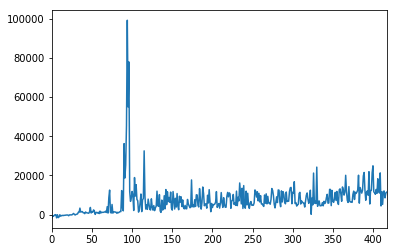

In [ ]:
#We first demonstrate the merits of using normalized results (Part 2) (Average Reward/Step over an episode) 
#over total rewards (Part 1) per episode using the vanilla (unmodified) DDPG architecture

%matplotlib inline

import pickle
import seaborn
import matplotlib as plt

#Part 1: Vanilla Architecture, Total Rewards/Episode
#Here we see a confusing and hard to interpret representation of learning. It is not clear how much better we get over time

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/InterEpisode.pkl", "rb" ))

rewards = []
j = 0

for i in interepisode:
    rewards.append(i[2])
                       
seaborn.tsplot(data = rewards)

/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


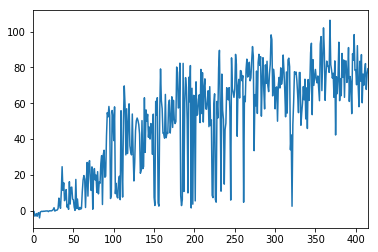

In [25]:
#Part 2: Vanilla Architecture, Average Reward/Step
#Here we see a more meaningful progression of learning, showing a clear upwards trend faithful to the performance of the car

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/InterEpisode.pkl", "rb" ))

rewards = []
j = 0

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)

291


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


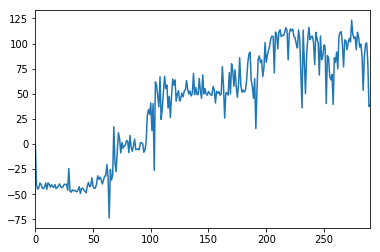

In [34]:
#Improvement #1: Modifying the termination conditions
#Here we modify the termination conditions and see the learning rate accelerate
#You can notice the improvement in both the rate and regularity of learning

%matplotlib inline

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/improvements/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)



210


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


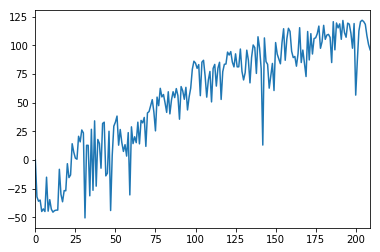

In [21]:
#Improvement #2: Modifying the batch normalization
#We add batch normalization in the actor-critic network and see the learning accelerate once again

%matplotlib inline

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/batch_norm_new/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)

62


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


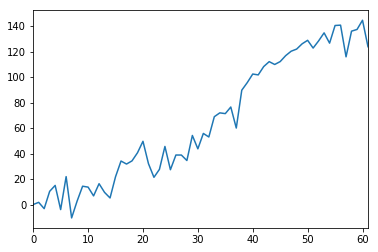

In [22]:
#Improvement #3: Improving the car
#Here we modify the vehicle (non deep learning modification), which allows the rewards to surpass the previous results
#Even with only 60 episodes

%matplotlib inline

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/batch_norm_fastcar/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)

/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


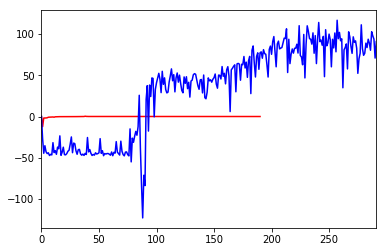

In [43]:
#Now that we have done multiple optimizations for learning on a simple, one-track scenario, we want to make the agent more
#versatile and tolerate both multiplayer and track-rotation conditions. We compare and contrast the results of the baseline
#versus the improvement on another track. We show there is clear improvement in flexibility given our changes

#1: Before, Red

%matplotlib inline

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/othermap_baseline/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'red')

#After, Blue

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/othermap_improvements/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'blue')




/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


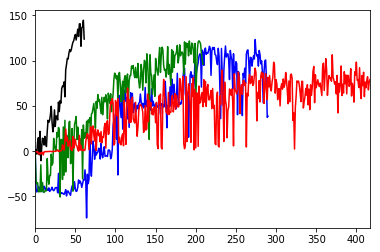

In [5]:
#Finally, we show all the curves and their progression as the improvements go on
%matplotlib inline


#Improvement 1, Termination Conditions, Blue

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/improvements/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'blue')

#Improvement 2, Batch Norm + Termination Conditions, Green

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/batch_norm_new/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'green')

#Improvement 3, Fast Car + Batch Norm + Termination Condtions, Black

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/batch_norm_fastcar/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'black')


#Baseline, Red

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'red')


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


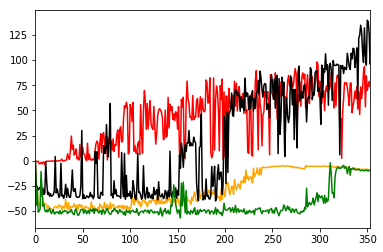

In [52]:
#We also show some of our failed experiments as compared to the baseline

%matplotlib inline

#Baseline, Red

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'red')

#Learning Rate Modification, Orange

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_newlr/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'orange')

#Changing the reward to incentive purely speed, Black (Inconsistent Learning)

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_speedunl_norotate_sp/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'black')

#Batch normalization while preloading non batchnormalized weights, Green

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/batch_norm_reloaded/InterEpisode.pkl", "rb" ))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards, color = 'green')


600


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


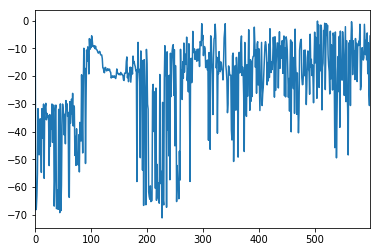

In [35]:
#We now try with only the image as the input, without any modifications but with our previous improvements
#We see that this is woefully insufficient to create any sort of learning and reward never goes above 0 (it hits walls 
#more often than staying on the track)
#Rewards: Img Unprocessed 

%matplotlib inline

import pickle
import seaborn
import matplotlib as plt

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_img_unprocessed/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)



600


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


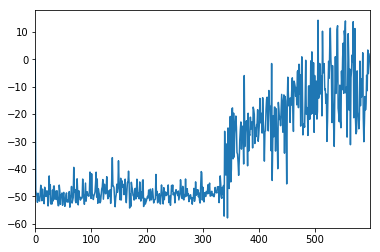

In [36]:
#Here we show the results after passing the image through the CNN defined in the Atari paper (Mnih et al)
#We see drastic improvement in the ability to learn, with rewards just barely peaking 0 by the end of the training period
#Rewards: Img Unprocessed 2

%matplotlib inline

import pickle
import seaborn
import matplotlib as plt

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/pickles/baseline_img_processed/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)



3401


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


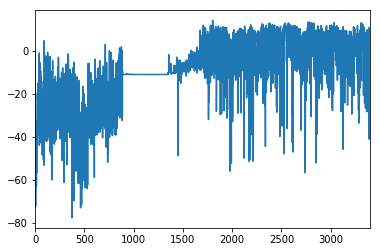

/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


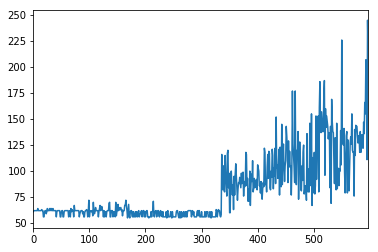

In [ ]:
#Steps per Episode: Img Unprocessed

rewards = []
j = 0

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][1]-interepisode[i-1][1])
                       
seaborn.tsplot(data = rewards)



/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


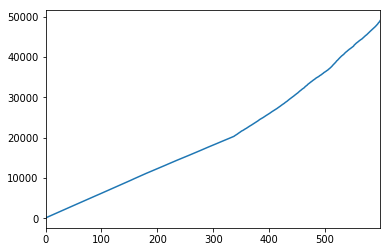

(1, 119, -2687.0373388397443, 9.4365065051412049)

1645


/home/lou/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


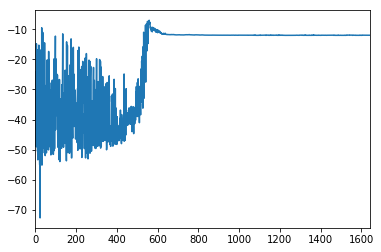

In [1]:
#Interepisode Rewards Normalized: Multi

%matplotlib inline

import pickle
import seaborn
import matplotlib as plt

interepisode = pickle.load(open("/home/lou/DDPG-Keras-Torcs/InterEpisode.pkl", "rb" ))

print(len(interepisode))

rewards = []
j = 0

for i in range(len(interepisode)):
    j += 1
    if j > 2:
        rewards.append(interepisode[i][2]/(interepisode[i][1]-interepisode[i-1][1]))
                       
seaborn.tsplot(data = rewards)